# Global $\chi$ analysis

In [1]:
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
#import iris.plot as iplt
#import iris
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors


from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import pandas as pd
import gc

## load data 

In [2]:
ds = xr.open_dataset("../nc_files/f09_mask.nc")
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))

In [3]:
ds.sel(season=["JJA","DJF"])[["chi_abd","chi_opt1","chi_hyg"]]\
.to_dataframe().describe()

,chi_abd,chi_opt1,chi_hyg
count,108527.000000,65909.000000,86307.000000
mean,75.950089,75.499901,62.916161
std,11.172760,8.310899,10.960590
min,22.932678,48.747944,19.326889
25%,70.345947,69.879539,55.686806
50%,77.437614,76.818733,62.027161
75%,84.802155,81.637024,70.452606
max,95.841545,94.973610,90.213753


## chi_abd

### DJF

In [4]:
DJF=ds["chi_abd"].sel(season="DJF")
JJA=ds["chi_abd"].sel(season="JJA")

In [5]:
DJF.to_dataframe().describe()

,chi_abd
count,54490.000000
mean,74.616837
std,10.613474
min,27.061340
25%,70.350441
50%,74.678986
75%,83.746666
max,95.505226


<xarray.DataArray 'chi_abd' ()>
array(35.5105, dtype=float32)
Coordinates:
    season   <U3 'DJF'

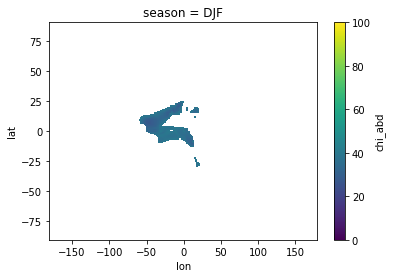

In [6]:
DJF.where(DJF<40).plot(vmin=0,vmax=100)
DJF.where(DJF<40).mean()

<xarray.DataArray 'chi_abd' ()>
array(84.96752, dtype=float32)
Coordinates:
    season   <U3 'DJF'

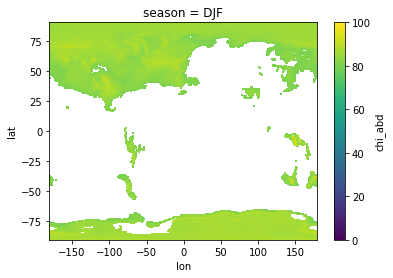

In [7]:
DJF.where(DJF>80).plot(vmin=0,vmax=100)
DJF.where(DJF>80).mean()

### JJA

In [8]:
JJA.to_dataframe().describe()

,chi_abd
count,54037.000000
mean,77.294518
std,11.555075
min,22.932678
25%,70.343559
50%,80.489578
75%,87.146194
max,95.841545


<xarray.DataArray 'chi_abd' ()>
array(35.73945, dtype=float32)
Coordinates:
    season   <U3 'JJA'

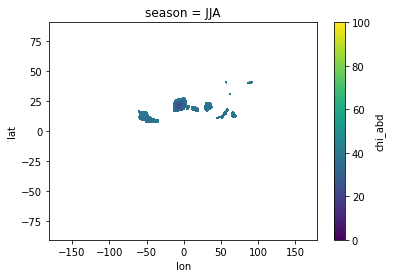

In [9]:
JJA.where(JJA<40).plot(vmin=0,vmax=100)
JJA.where(JJA<40).mean()

<xarray.DataArray 'chi_abd' ()>
array(85.96741, dtype=float32)
Coordinates:
    season   <U3 'JJA'

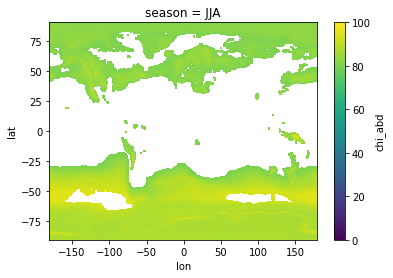

In [10]:
JJA.where(JJA>80).plot(vmin=0,vmax=100)
JJA.where(JJA>80).mean()

In [11]:
DJF.where(DJF<40).count()

<xarray.DataArray 'chi_abd' ()>
array(970)
Coordinates:
    season   <U3 'DJF'

In [12]:
JJA.where(JJA<40).count()

<xarray.DataArray 'chi_abd' ()>
array(379)
Coordinates:
    season   <U3 'JJA'

In [13]:
DJF.where(DJF>80).count()

<xarray.DataArray 'chi_abd' ()>
array(18725)
Coordinates:
    season   <U3 'DJF'

In [14]:
JJA.where(JJA>80).count()

<xarray.DataArray 'chi_abd' ()>
array(28067)
Coordinates:
    season   <U3 'JJA'

## chi_opt1

In [15]:
DJF=ds["chi_opt1"].sel(season="DJF")
JJA=ds["chi_opt1"].sel(season="JJA")

### DJF

,chi_opt1
count,28840.000000
mean,75.154922
std,8.593276
min,49.112278
25%,69.427811
50%,76.193138
75%,81.980133
max,94.370903


<xarray.DataArray 'chi_opt1' ()>
array(84.35696, dtype=float32)
Coordinates:
    season   <U3 'DJF'

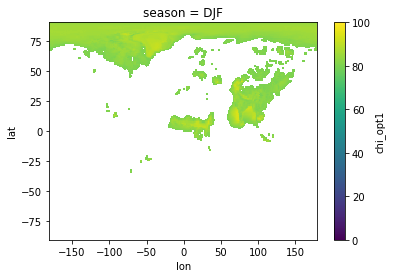

In [16]:
display(DJF.to_dataframe().describe())
DJF.where(DJF>80).plot(vmin=0,vmax=100)
DJF.where(DJF>80).mean()

<xarray.DataArray 'chi_opt1' ()>
array(84.35696, dtype=float32)
Coordinates:
    season   <U3 'DJF'

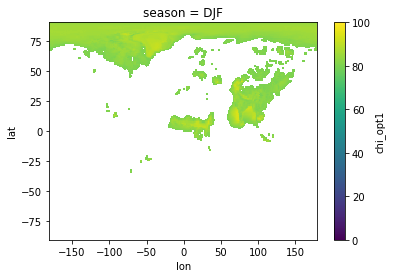

In [17]:
DJF.where(DJF>80).plot(vmin=0,vmax=100)
DJF.where(DJF>80).mean()

### JJA

,chi_opt1
count,37069.000000
mean,75.768288
std,8.074318
min,48.747944
25%,70.165184
50%,77.413895
75%,81.457497
max,94.973610


<xarray.DataArray 'chi_opt1' ()>
array(83.8987, dtype=float32)
Coordinates:
    season   <U3 'JJA'

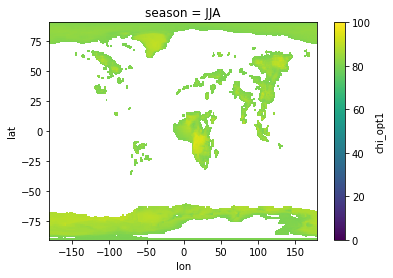

In [18]:
display(JJA.to_dataframe().describe())
JJA.where(JJA>80).plot(vmin=0,vmax=100)
JJA.where(JJA>80).mean()

## chi_hyg

In [19]:
DJF=ds["chi_hyg"].sel(season="DJF")
JJA=ds["chi_hyg"].sel(season="JJA")

### DJF

,chi_hyg
count,38320.000000
mean,62.591434
std,11.605396
min,24.101732
25%,55.260250
50%,62.977139
75%,70.890732
max,90.213753


<xarray.DataArray 'chi_hyg' ()>
array(76.17365, dtype=float32)
Coordinates:
    season   <U3 'DJF'

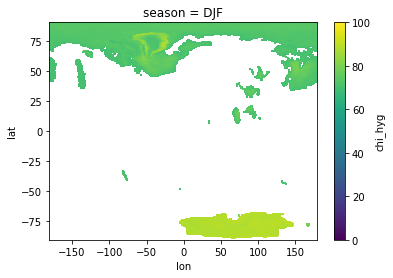

In [20]:
display(DJF.to_dataframe().describe())
DJF.where(DJF>70).plot(vmin=0,vmax=100)
DJF.where(DJF>70).mean()

<xarray.DataArray 'chi_hyg' ()>
array(35.415756, dtype=float32)
Coordinates:
    season   <U3 'DJF'

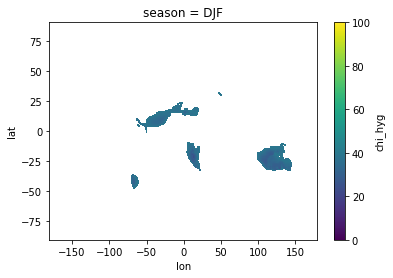

In [21]:
DJF.where(DJF<40).plot(vmin=0,vmax=100)
DJF.where(DJF<40).mean()

### JJA

,chi_hyg
count,47987.000000
mean,63.175468
std,10.409909
min,19.326889
25%,55.866219
50%,61.191879
75%,70.112488
max,89.176903


<xarray.DataArray 'chi_hyg' ()>
array(77.43805, dtype=float32)
Coordinates:
    season   <U3 'JJA'

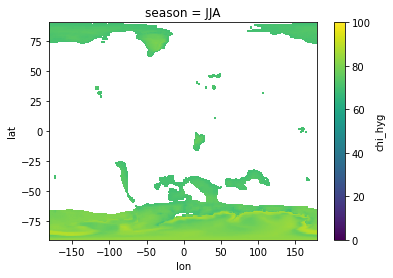

In [22]:
display(JJA.to_dataframe().describe())
JJA.where(JJA>70).plot(vmin=0,vmax=100)
JJA.where(JJA>70).mean()

<xarray.DataArray 'chi_hyg' ()>
array(35.44183, dtype=float32)
Coordinates:
    season   <U3 'JJA'

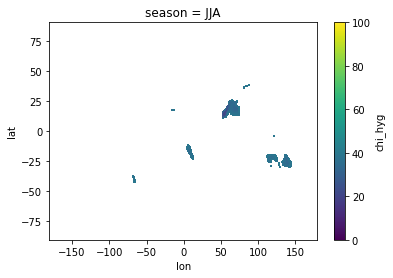

In [23]:
JJA.where(JJA<40).plot(vmin=0,vmax=100)
JJA.where(JJA<40).mean()

## Minimum value of $\chi_o$

In [24]:
nc_path = "/data/keeling/a/zzheng25/a/PartMC-CESM-project/CESM_prediction/f09/"
for i in [1,6,7,8,11,12]:
    month=str(i).zfill(2)
    print(month)
    ds = xr.open_dataset(nc_path+month+".nc")
    print("chi_opt1 min:",ds["chi_opt1"].min(),"\n")
    del ds
    gc.collect()

01
chi_opt1 min: <xarray.DataArray 'chi_opt1' ()>
array(0.0696916, dtype=float32) 

06
chi_opt1 min: <xarray.DataArray 'chi_opt1' ()>
array(0.166278, dtype=float32) 

07
chi_opt1 min: <xarray.DataArray 'chi_opt1' ()>
array(0.22792459, dtype=float32) 

08
chi_opt1 min: <xarray.DataArray 'chi_opt1' ()>
array(0.288009, dtype=float32) 

11
chi_opt1 min: <xarray.DataArray 'chi_opt1' ()>
array(0.18683812, dtype=float32) 

12
chi_opt1 min: <xarray.DataArray 'chi_opt1' ()>
array(0.03199366, dtype=float32) 

